In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import eigsh
from scipy.integrate import simps

# Задание 1.

In [2]:
def potential(x, koef = 1):
    return(koef * np.power(x, 2) / 2)

In [3]:
def laplasian(psi, x):
    psi_fft = np.fft.fftn(psi)
    N = len(psi_fft)
    L = x[-1]-x[0]
    coef = np.zeros(N, dtype=np.cdouble)
    for k in range(N):
        if k <= N/2:
            coef[k] = psi_fft[k]*(-1)*(2*math.pi/L*k)**2
        else:
            coef[k] = psi_fft[k]*(-1)*(2*math.pi/L*(k-N))**2
    return(np.fft.ifftn(coef))

In [4]:
def hamiltonian(x, mass, pot):
    def action(psi):
        return(-1.0 / (2.0 * mass) * laplasian(psi, x).real + pot(x) * psi)
    return(action)

In [5]:
mass = 1
NUMBER_OF_POINTS = 500
l = 10
koef = 1
x = np.linspace(-l/2, l/2, NUMBER_OF_POINTS)
hamiltonian1 = hamiltonian(x, mass, potential)
H = LinearOperator((NUMBER_OF_POINTS, NUMBER_OF_POINTS), matvec=hamiltonian1)

In [6]:
e, v = eigsh(H, k = 10, which='SA')
print(e)

[0.501002   1.50300602 2.50500993 3.5070152  4.50900486 5.51111734
 6.51236521 7.51787347 8.50315482 9.55480279]


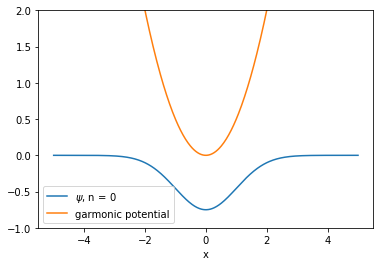

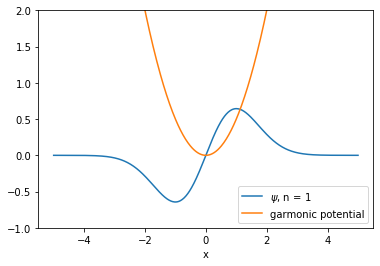

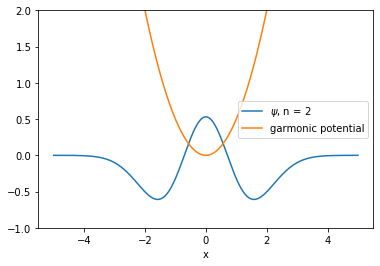

In [7]:
# Normalize wave-functions
deltaX = x[1] - x[0]
#psi = v[:, 1]
#psi /= np.sqrt(simps(np.power(psi, 2), x))

# Plot wave-function
for i in range(3):
    psi = v[:, i]
    psi /= np.sqrt(simps(np.power(psi, 2), x))
    plt.plot(x, psi, label = '$\psi$, n = '+str(i))
    plt.plot(x, potential(x), label = 'garmonic potential')
    plt.ylim(-1, 2)
    plt.xlabel('x')
    plt.legend()
    plt.show()

# Задание 2.

In [8]:
def potential1(x, epsilon = 1, delta = 1):
    return(epsilon * ((x/delta)**4 - 2 * (x/delta)**2 + 1))

In [9]:
mass = 1
NUMBER_OF_POINTS = 500
l = 10
koef = 1
x = np.linspace(-l/2, l/2, NUMBER_OF_POINTS)
hamiltonian1 = hamiltonian(x, mass, potential1)
H = LinearOperator((NUMBER_OF_POINTS, NUMBER_OF_POINTS), matvec=hamiltonian1)

In [10]:
e, v = eigsh(H, k = 5, which='SA')
print(e)

[0.87077995 1.66603456 3.55365388 5.6817028  8.14971341]


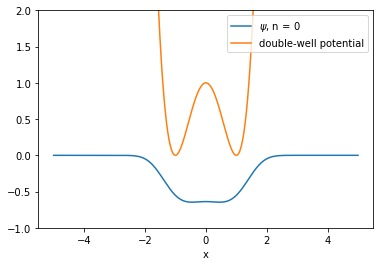

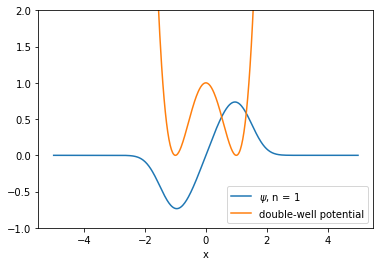

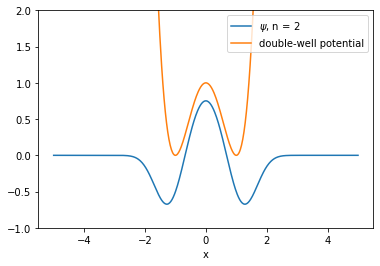

In [11]:
# Normalize wave-functions
deltaX = x[1] - x[0]
#psi = v[:, 0]
#psi /= np.sqrt(simps(np.power(psi, 2), x))

# Plot wave-function
for i in range(3):
    psi = v[:, i]
    psi /= np.sqrt(simps(np.power(psi, 2), x))
    plt.plot(x, psi, label = '$\psi$, n = '+str(i))
    plt.plot(x, potential1(x), label = 'double-well potential')
    plt.ylim(-1, 2)
    plt.xlabel('x')
    plt.legend()
    plt.show()

# Задание 3.

In [42]:
def potential2(x, D = 100, alpha = 1, xe = 0):
    return(D * (np.exp(-2*alpha*(x-xe))-2*np.exp(-alpha*(x-xe)) + 1) )

In [46]:
mass = 1
NUMBER_OF_POINTS = 500
l = 4
i = 4
x = np.linspace(-l/i, (i-1)*l/i, NUMBER_OF_POINTS)
hamiltonian1 = hamiltonian(x, mass, potential2)
H = LinearOperator((NUMBER_OF_POINTS, NUMBER_OF_POINTS), matvec=hamiltonian1)

In [50]:
e, v = eigsh(H, k = 10, which='SA')
print(e)

[ 6.95973678 20.12620124 32.2886533  43.44709211 53.60151572 62.75192634
 70.89824719 78.04286947 84.22170642 89.8648603 ]


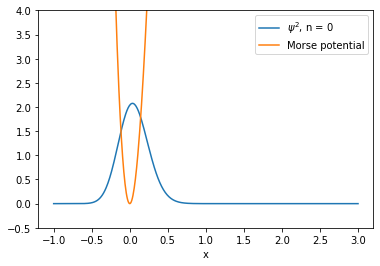

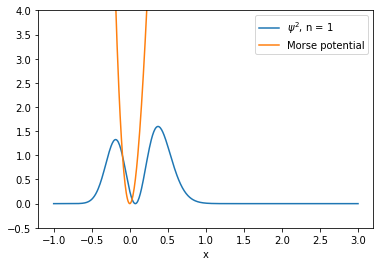

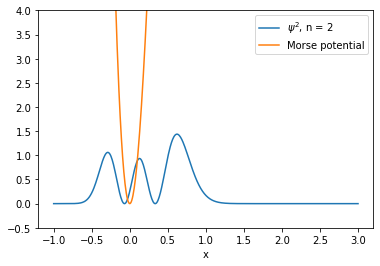

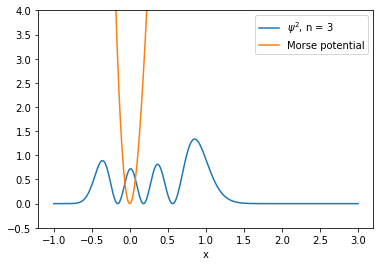

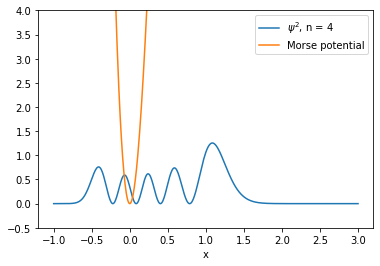

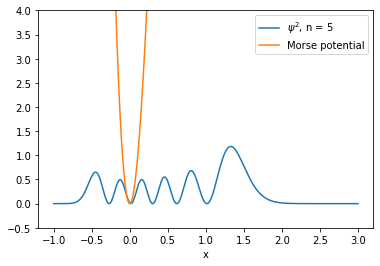

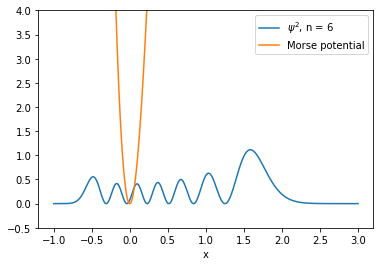

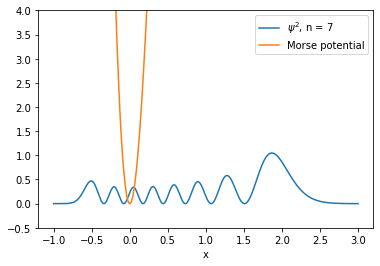

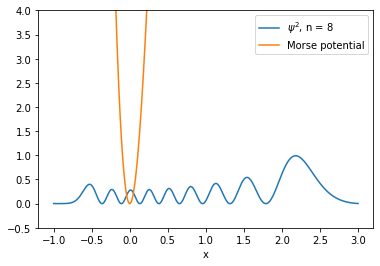

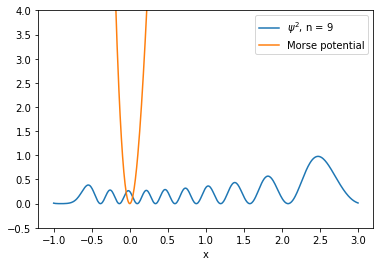

In [52]:
# Normalize wave-functions
deltaX = x[1] - x[0]
#psi = v[:, 0]
#psi /= np.sqrt(simps(np.power(psi, 2), x))

# Plot wave-function
for i in range(10):
    psi = v[:, i]
    psi /= np.sqrt(simps(np.power(psi, 2), x))
    plt.plot(x, psi**2, label = '$\psi^2$, n = '+str(i))
    plt.plot(x, potential2(x), label = 'Morse potential')
    plt.ylim(-0.5, 4)
    #plt.xlim(-0.75, 1)
    plt.xlabel('x')
    plt.legend()
    plt.show()